 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path('../Starter_Code/Resources/whale_returns.csv')
csvpath

whale_df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path('../Starter_Code/Resources/algo_returns.csv')
algo_data 

algo_df = pd.read_csv(algo_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"].head()



Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
Name: Close, dtype: object

In [11]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [12]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close':'sp500_returns'})
daily_returns

,sp500_returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


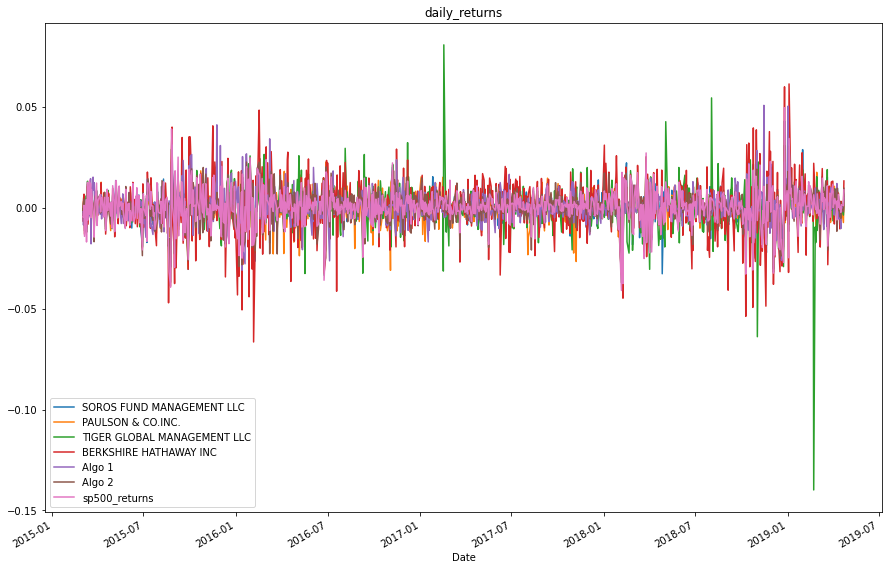

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10), title="daily_returns")
combined_df

#### Calculate and Plot cumulative returns.

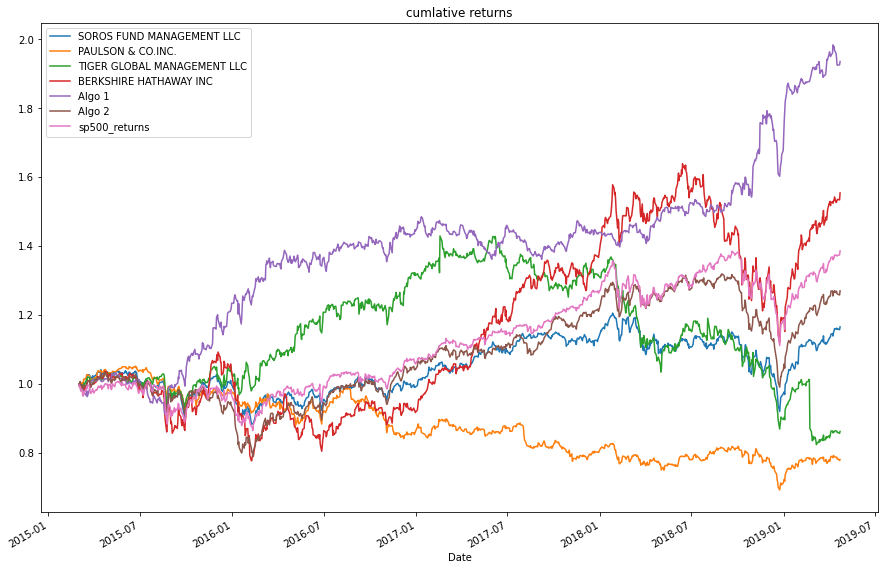

In [23]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title='cumlative returns') 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


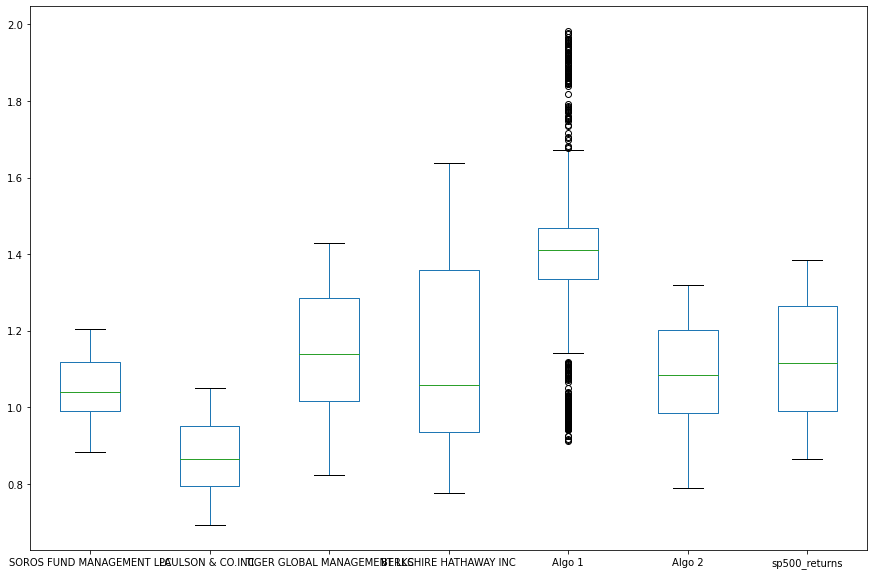

In [25]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(15,10))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.sort_values(inplace=True)
daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
sp500_returns                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500


# Determine which portfolios are riskier than the S&P 500

# 'Berkshire and Tiger global management are riskier than S&P 500'


In [27]:
### Calculate the Annualized Standard Deviation
annualized_std = daily_std * np.sqrt(365)
annualized_std

PAULSON & CO.INC.              0.134176
Algo 1                         0.145584
SOROS FUND MANAGEMENT LLC      0.150841
Algo 2                         0.159379
sp500_returns                  0.163419
TIGER GLOBAL MANAGEMENT LLC    0.208129
BERKSHIRE HATHAWAY INC         0.246810
dtype: float64

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500_returns                  0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

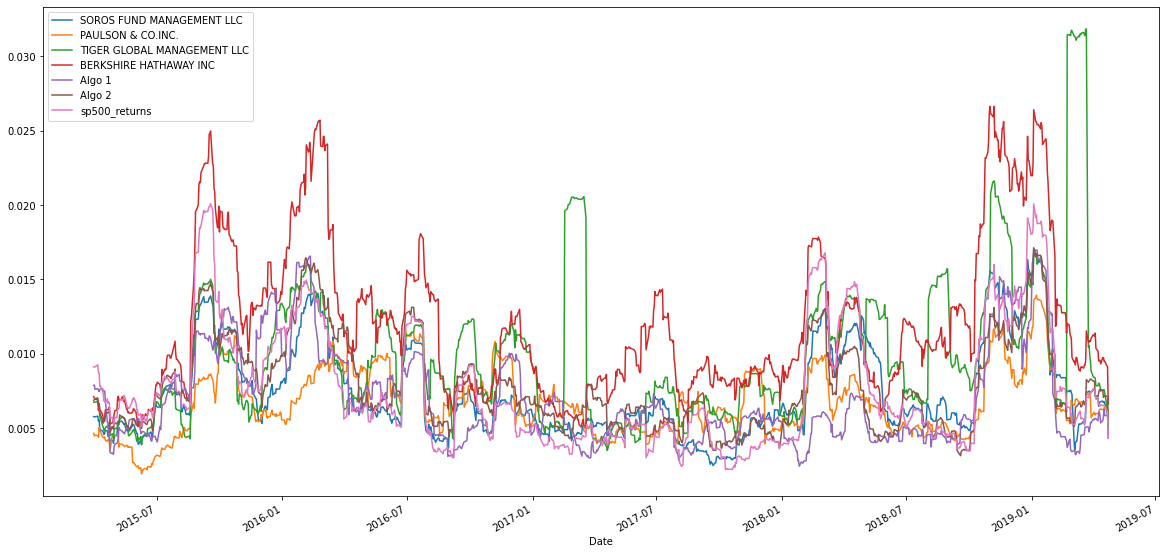

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

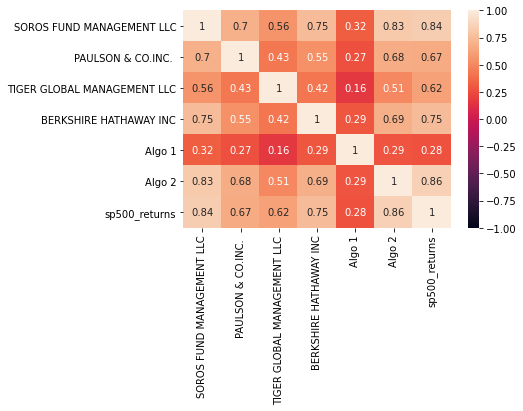

In [30]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

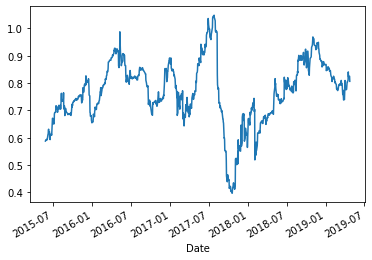

In [31]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['sp500_returns'])
covariance
# Calculate variance of S&P 500
variance = combined_df['sp500_returns'].rolling(window=60).var()
variance
# Computing beta
soros_beta = covariance / variance
soros_beta.plot()
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

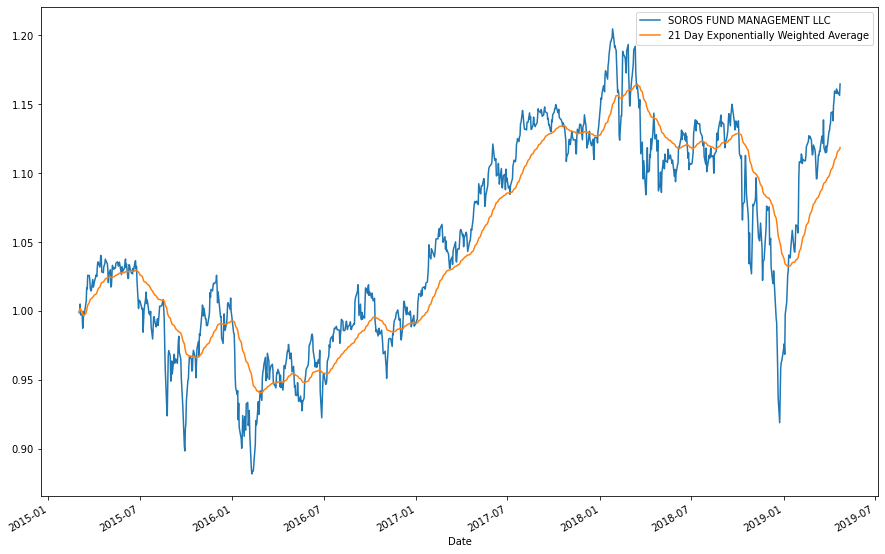

In [32]:
# Use `ewm` to calculate the rolling window
ax = cumulative_returns['SOROS FUND MANAGEMENT LLC'].plot()
cumulative_returns['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).mean().plot(figsize=(15,10))
ax.legend(['SOROS FUND MANAGEMENT LLC', '21 Day Exponentially Weighted Average'])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500_returns                  0.648267
dtype: float64

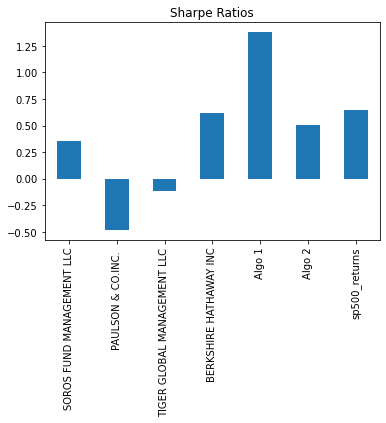

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [35]:
# Reading data from 1st stock
amzn_data = Path('../Starter_Code/Resources/AMZN.csv')
amzn_data

amzn_df = pd.read_csv(amzn_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
amzn_df.head()


,Close
Date,
2015-01-21 16:00:00,297.25
2015-01-22 16:00:00,310.32
2015-01-23 16:00:00,312.39
2015-01-26 16:00:00,309.66
2015-01-27 16:00:00,306.75


In [36]:
# Reading data from 2nd stock
nike_data = Path('../Starter_Code/Resources/NIKE.csv')
nike_data 

nike_df = pd.read_csv(nike_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
nike_df.head()

,Close
Date,
2015-01-21 16:00:00,46.76
2015-01-22 16:00:00,47.93
2015-01-23 16:00:00,48.08
2015-01-26 16:00:00,48.18
2015-01-27 16:00:00,47.25


In [37]:
# Reading data from 3rd stock
jpm_data = Path('../Starter_Code/Resources/JPM.csv')
jpm_data 

jpm_df = pd.read_csv(jpm_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
jpm_df.head()

,Close
Date,
2015-01-21 16:00:00,55.89
2015-01-22 16:00:00,57.59
2015-01-23 16:00:00,56.68
2015-01-26 16:00:00,56.77
2015-01-27 16:00:00,56.20


In [38]:
# Combine all stocks in a single DataFrame
combined_df2 = pd.concat([amzn_df, nike_df, jpm_df], axis='columns', join='inner')
combined_df2.sort_index(inplace=True)
combined_df2.head()

,Close,Close,Close
Date,,,
2015-01-21 16:00:00,297.25,46.76,55.89
2015-01-22 16:00:00,310.32,47.93,57.59
2015-01-23 16:00:00,312.39,48.08,56.68
2015-01-26 16:00:00,309.66,48.18,56.77
2015-01-27 16:00:00,306.75,47.25,56.20


In [39]:
# Reset Date index
combined_df2.index = combined_df2.index.date
combined_df2.head()

,Close,Close,Close
2015-01-21,297.25,46.76,55.89
2015-01-22,310.32,47.93,57.59
2015-01-23,312.39,48.08,56.68
2015-01-26,309.66,48.18,56.77
2015-01-27,306.75,47.25,56.20


In [40]:
# Reorganize portfolio data by having a column per symbol
combined_df2.columns = ['AMZN', 'NKE', 'JPM']
combined_df2.head()

,AMZN,NKE,JPM
2015-01-21,297.25,46.76,55.89
2015-01-22,310.32,47.93,57.59
2015-01-23,312.39,48.08,56.68
2015-01-26,309.66,48.18,56.77
2015-01-27,306.75,47.25,56.20


In [41]:
# Calculate daily returns
my_daily_returns = combined_df2.pct_change()
my_daily_returns
# Drop NAs
my_daily_returns.dropna(inplace=True)
my_daily_returns
# Display sample data
my_daily_returns.head()

,AMZN,NKE,JPM
2015-01-22,0.043970,0.025021,0.030417
2015-01-23,0.006671,0.003130,-0.015801
2015-01-26,-0.008739,0.002080,0.001588
2015-01-27,-0.009397,-0.019303,-0.010041
2015-01-28,-0.009258,-0.012487,-0.025801


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_daily_returns.dot(weights)
portfolio_returns
# Display sample data
portfolio_returns.head()

2015-01-22    0.033136
2015-01-23   -0.002000
2015-01-26   -0.001690
2015-01-27   -0.012914
2015-01-28   -0.015849
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [60]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
combined_returns.sort_index(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.002461
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002342
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.006966
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.017834
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003786


In [63]:
combined_returns.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500 Returns', 'My Portfolio']
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.002461
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002342
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.006966
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.017834
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003786
...,...,...,...,...,...,...,...,...
2019-01-14,-0.001999,-0.005161,0.007798,-0.001253,-0.005642,-0.006659,-0.005258,-0.001089
2019-01-15,0.006397,0.002851,0.012879,0.021566,0.000369,0.007277,0.010722,0.022106
2019-01-16,0.004426,0.000646,0.005657,0.004354,-0.001423,0.004469,0.002222,0.003667
2019-01-17,0.003667,0.007093,0.006109,0.005210,-0.000851,0.004454,0.007591,0.009457


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.002461
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002342
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.006966
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.017834
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003786


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
combined_annualized_std = combined_returns.std() * np.sqrt(252)
combined_annualized_std.sort_values(inplace=True)
combined_annualized_std


PAULSON & CO.INC.              0.112205
Algo 1                         0.123227
SOROS FUND MANAGEMENT LLC      0.126223
Algo 2                         0.133861
S&P 500 Returns                0.137757
TIGER GLOBAL MANAGEMENT LLC    0.160907
My Portfolio                   0.191879
BERKSHIRE HATHAWAY INC         0.207349
dtype: float64

### Calculate and plot rolling `std` with 21-day window

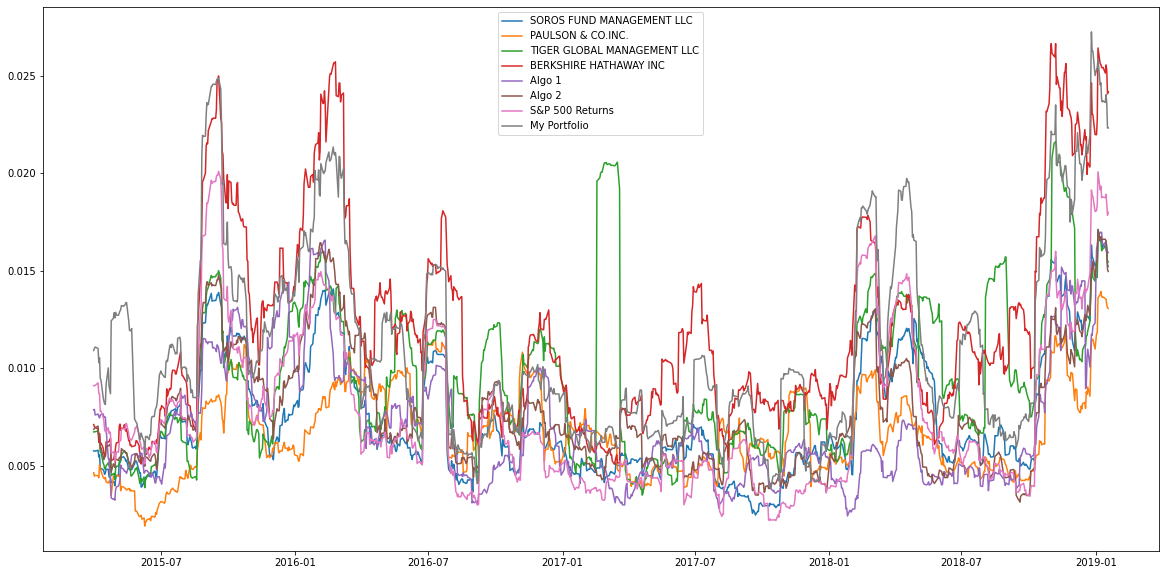

In [66]:
# Calculate rolling standard deviation
combined_rolling_std = combined_annualized_std.rolling(window=21).std()
# Plot rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

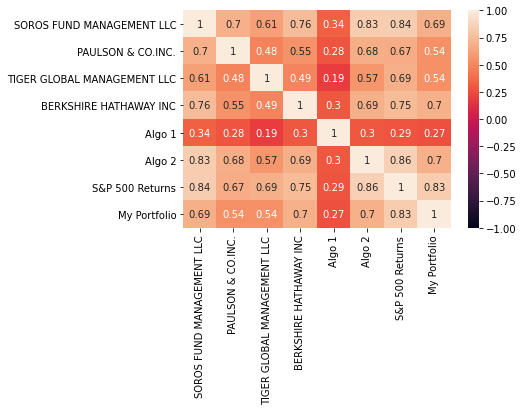

In [67]:
# Calculate and plot the correlation
correlation2 = combined_returns.corr()
sns.heatmap(correlation2, vmin=-1 , vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

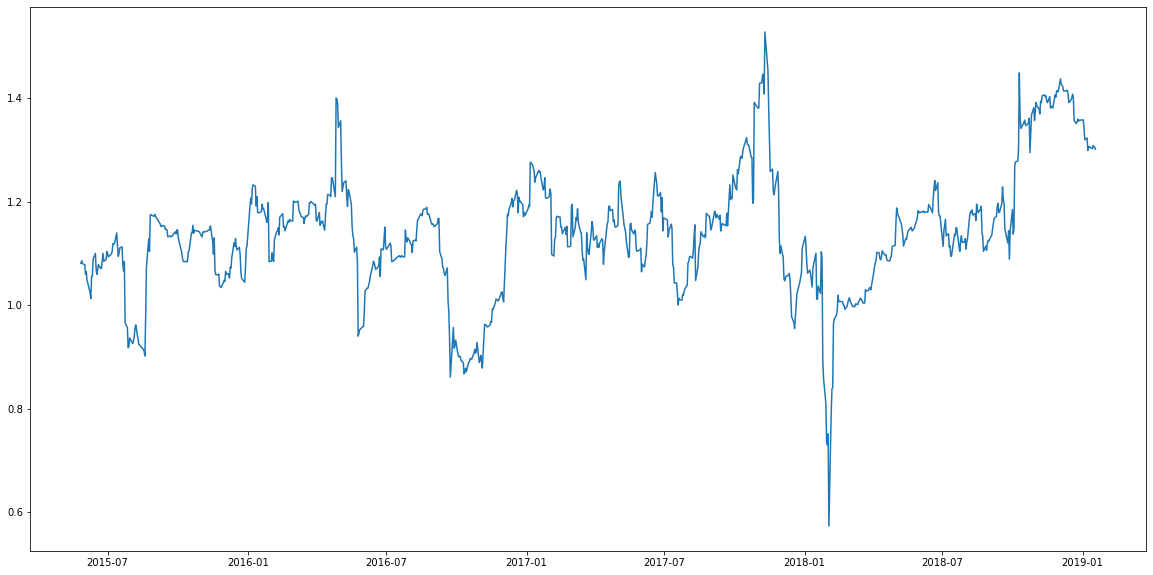

In [68]:
# Calculate and plot Beta
covariance2 = combined_returns['My Portfolio'].rolling(window=60).cov(combined_returns['S&P 500 Returns'])
covariance2                                                                      

variance2 = combined_returns['S&P 500 Returns'].rolling(window=60).var()
variance2

my_beta = covariance2 / variance2
my_beta

my_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.178882
PAULSON & CO.INC.             -0.564150
TIGER GLOBAL MANAGEMENT LLC    0.061332
BERKSHIRE HATHAWAY INC         0.460688
Algo 1                         1.334919
Algo 2                         0.331908
S&P 500 Returns                0.502818
My Portfolio                   1.285507
dtype: float64

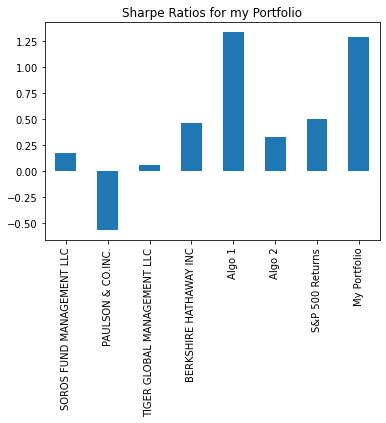

In [70]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind='bar', title='Sharpe Ratios for my Portfolio')

### How does your portfolio do?

Write your answer here!

My portfolio is good because the sharpe ratio is high which means my portfolio is a good investment compared to others